In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [157]:
billingRaw = pd.read_csv('../datasets/billing.csv')
eventsRaw = pd.read_csv('../datasets/events.csv')
sessionsRaw = pd.read_csv('../datasets/sessions.csv')
usersRaw = pd.read_csv('../datasets/users.csv')

In [158]:
billingRaw[:5]

,user_id,month,plan_tier,active_seats,mrr,discount_applied,invoices_overdue,support_ticket_count
0,f94d1824-8742-4000-8b6d-39d70958490b,2024-05,free,2,0.0,0,0,0
1,f94d1824-8742-4000-8b6d-39d70958490b,2024-06,free,2,0.0,0,0,0
2,f94d1824-8742-4000-8b6d-39d70958490b,2024-07,free,1,0.0,0,0,0
3,f94d1824-8742-4000-8b6d-39d70958490b,2024-08,free,1,0.0,0,0,0
4,f94d1824-8742-4000-8b6d-39d70958490b,2024-09,free,1,0.0,0,0,0


In [159]:
billingRaw.loc[billingRaw['plan_tier'] == 'free', billingRaw.columns[2]] = 0
billingRaw.loc[billingRaw['plan_tier'] == 'standard', billingRaw.columns[2]] = 1
billingRaw.loc[billingRaw['plan_tier'] == 'premium', billingRaw.columns[2]] = 2
billingRaw['plan_tier'] = pd.to_numeric(billingRaw['plan_tier'], errors='coerce')

In [160]:
billingRaw[:5]

,user_id,month,plan_tier,active_seats,mrr,discount_applied,invoices_overdue,support_ticket_count
0,f94d1824-8742-4000-8b6d-39d70958490b,2024-05,0,2,0.0,0,0,0
1,f94d1824-8742-4000-8b6d-39d70958490b,2024-06,0,2,0.0,0,0,0
2,f94d1824-8742-4000-8b6d-39d70958490b,2024-07,0,1,0.0,0,0,0
3,f94d1824-8742-4000-8b6d-39d70958490b,2024-08,0,1,0.0,0,0,0
4,f94d1824-8742-4000-8b6d-39d70958490b,2024-09,0,1,0.0,0,0,0


In [161]:
billingRaw['month'] = pd.to_datetime(billingRaw['month'], format = '%Y-%m')

In [162]:
type(billingRaw['month'])

pandas.core.series.Series

In [163]:
billingRaw

,user_id,month,plan_tier,active_seats,mrr,discount_applied,invoices_overdue,support_ticket_count
0,f94d1824-8742-4000-8b6d-39d70958490b,2024-05-01,0,2,0.0,0,0,0
1,f94d1824-8742-4000-8b6d-39d70958490b,2024-06-01,0,2,0.0,0,0,0
2,f94d1824-8742-4000-8b6d-39d70958490b,2024-07-01,0,1,0.0,0,0,0
3,f94d1824-8742-4000-8b6d-39d70958490b,2024-08-01,0,1,0.0,0,0,0
4,f94d1824-8742-4000-8b6d-39d70958490b,2024-09-01,0,1,0.0,0,0,0
...,...,...,...,...,...,...,...,...
1000171,2bebcb3d-bead-492a-97e3-1346173ee638,2025-03-01,0,4,0.0,0,0,0
1000172,2bebcb3d-bead-492a-97e3-1346173ee638,2025-04-01,0,2,0.0,0,0,0
1000173,2bebcb3d-bead-492a-97e3-1346173ee638,2025-05-01,0,2,0.0,0,0,0
1000174,2bebcb3d-bead-492a-97e3-1346173ee638,2025-06-01,0,3,0.0,0,0,0


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

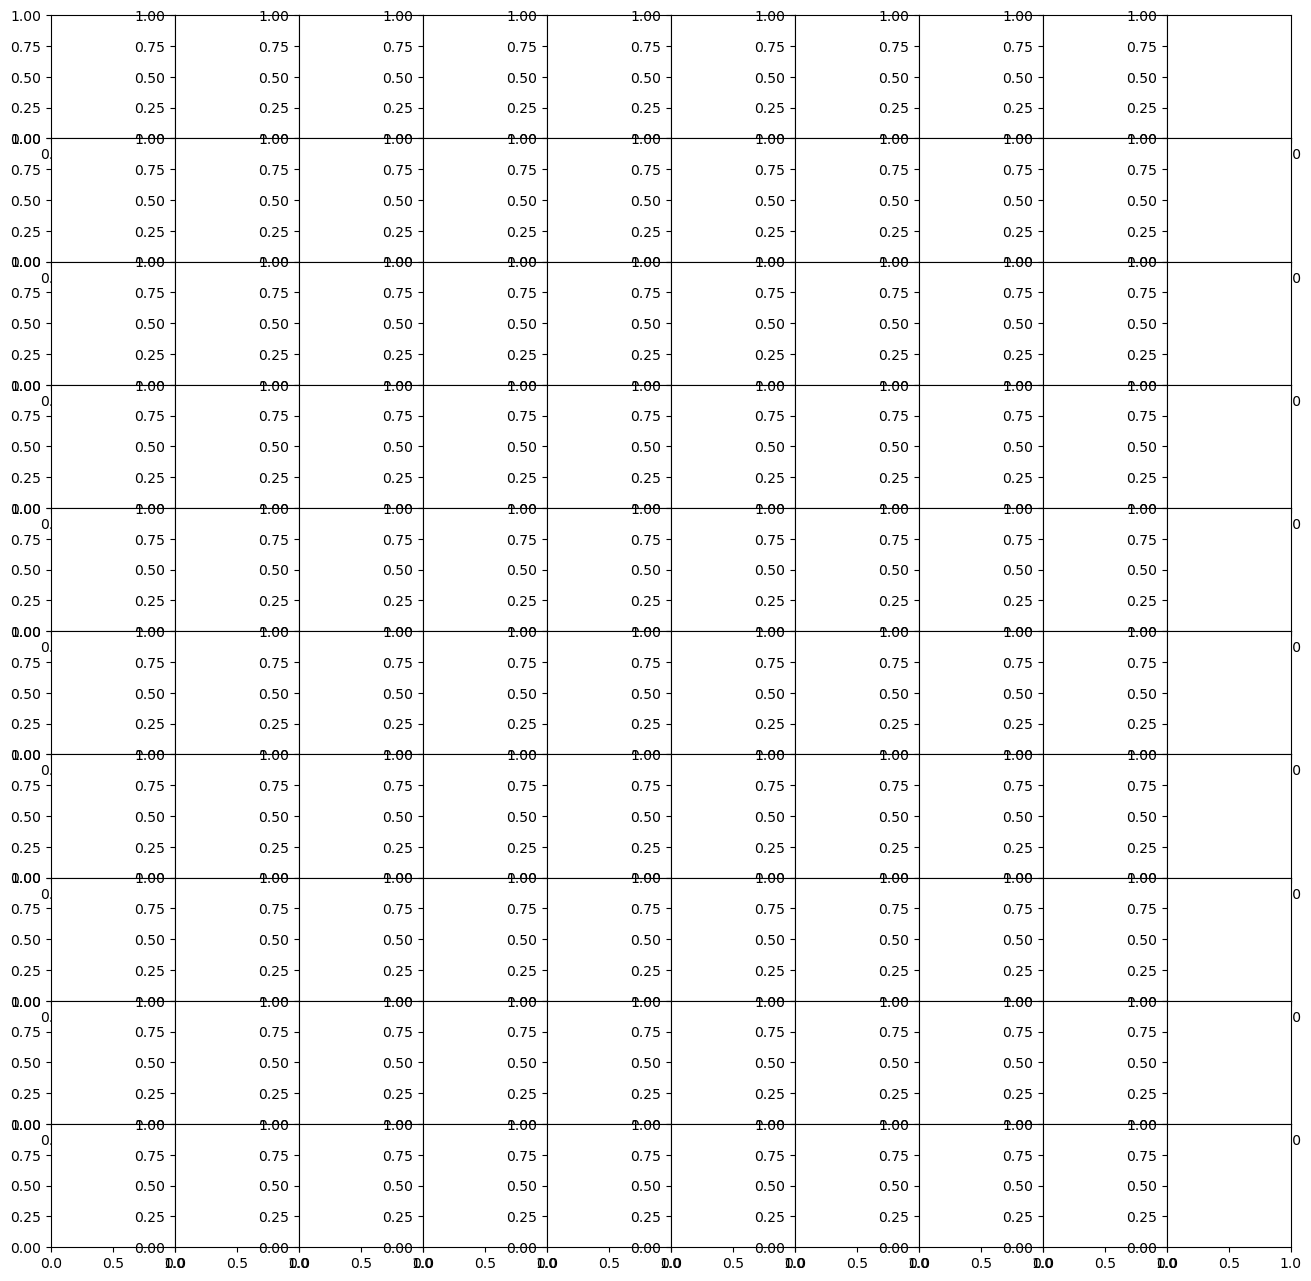

In [287]:
# pd.plotting.scatter_matrix(billingRaw, alpha=0.8, figsize=(16, 16), diagonal='hist');

In [165]:
upgrade_df = billingRaw.groupby('user_id')['plan_tier'].agg(['first', 'last']).reset_index()
upgrade_df['upgrade'] = (upgrade_df['last'] > upgrade_df['first']).astype(int)
upgrade_df.loc[upgrade_df['last'] < upgrade_df['first'], 'upgrade'] = -1
upgrade_df = upgrade_df.drop(['first', 'last'], axis = 1)

In [166]:
upgrade_df

,user_id,upgrade
0,0000093e-7258-43c0-b212-ea7212795ddf,0
1,0003c565-9352-45aa-a448-82b91e57b043,0
2,00044174-f9c1-4412-b9ca-584a21903f92,0
3,0005523a-ffde-4fe8-96d8-c203b1fe2f97,0
4,0006fdbd-c35d-4c0d-a948-e8ee10f279d5,0
...,...,...
99995,fffa9cdd-f19a-4849-ae3b-2302b5b68020,0
99996,fffcb715-b3de-4a0e-813a-df5dd2f833d2,0
99997,fffce54a-cd86-4f93-b529-d92586690bd5,0
99998,fffe77cc-44fd-401f-8fdd-9fa06afc6bc8,0


In [167]:
upgrade_df['upgrade'].value_counts()

upgrade
 0    95170
 1     2848
-1     1982
Name: count, dtype: int64

In [168]:
discount_df = billingRaw.groupby("user_id")["discount_applied"].max().reset_index().drop('user_id', axis = 1)
upgrade_df = pd.concat([upgrade_df, discount_df], axis = 1)

In [169]:
upgrade_df

,user_id,upgrade,discount_applied
0,0000093e-7258-43c0-b212-ea7212795ddf,0,0
1,0003c565-9352-45aa-a448-82b91e57b043,0,0
2,00044174-f9c1-4412-b9ca-584a21903f92,0,0
3,0005523a-ffde-4fe8-96d8-c203b1fe2f97,0,0
4,0006fdbd-c35d-4c0d-a948-e8ee10f279d5,0,0
...,...,...,...
99995,fffa9cdd-f19a-4849-ae3b-2302b5b68020,0,0
99996,fffcb715-b3de-4a0e-813a-df5dd2f833d2,0,0
99997,fffce54a-cd86-4f93-b529-d92586690bd5,0,0
99998,fffe77cc-44fd-401f-8fdd-9fa06afc6bc8,0,1


In [170]:
seats_df = billingRaw.groupby('user_id').tail(1)[['user_id', 'active_seats']].drop_duplicates('user_id')
upgrade_df = upgrade_df.merge(seats_df, on='user_id', how='left')

In [171]:
upgrade_df

,user_id,upgrade,discount_applied,active_seats
0,0000093e-7258-43c0-b212-ea7212795ddf,0,0,3
1,0003c565-9352-45aa-a448-82b91e57b043,0,0,3
2,00044174-f9c1-4412-b9ca-584a21903f92,0,0,6
3,0005523a-ffde-4fe8-96d8-c203b1fe2f97,0,0,2
4,0006fdbd-c35d-4c0d-a948-e8ee10f279d5,0,0,4
...,...,...,...,...
99995,fffa9cdd-f19a-4849-ae3b-2302b5b68020,0,0,11
99996,fffcb715-b3de-4a0e-813a-df5dd2f833d2,0,0,6
99997,fffce54a-cd86-4f93-b529-d92586690bd5,0,0,21
99998,fffe77cc-44fd-401f-8fdd-9fa06afc6bc8,0,1,46


In [172]:
invoices_df = billingRaw.groupby('user_id').tail(1)[['user_id', 'invoices_overdue']].drop_duplicates('user_id')
upgrade_df = upgrade_df.merge(invoices_df, on='user_id', how='left')

In [173]:
upgrade_df

,user_id,upgrade,discount_applied,active_seats,invoices_overdue
0,0000093e-7258-43c0-b212-ea7212795ddf,0,0,3,0
1,0003c565-9352-45aa-a448-82b91e57b043,0,0,3,0
2,00044174-f9c1-4412-b9ca-584a21903f92,0,0,6,0
3,0005523a-ffde-4fe8-96d8-c203b1fe2f97,0,0,2,0
4,0006fdbd-c35d-4c0d-a948-e8ee10f279d5,0,0,4,0
...,...,...,...,...,...
99995,fffa9cdd-f19a-4849-ae3b-2302b5b68020,0,0,11,0
99996,fffcb715-b3de-4a0e-813a-df5dd2f833d2,0,0,6,0
99997,fffce54a-cd86-4f93-b529-d92586690bd5,0,0,21,0
99998,fffe77cc-44fd-401f-8fdd-9fa06afc6bc8,0,1,46,0


In [174]:
support_df = billingRaw.groupby('user_id').tail(1)[['user_id', 'support_ticket_count']].drop_duplicates('user_id')
upgrade_df = upgrade_df.merge(support_df, on='user_id', how='left')

In [175]:
upgrade_df

,user_id,upgrade,discount_applied,active_seats,invoices_overdue,support_ticket_count
0,0000093e-7258-43c0-b212-ea7212795ddf,0,0,3,0,0
1,0003c565-9352-45aa-a448-82b91e57b043,0,0,3,0,1
2,00044174-f9c1-4412-b9ca-584a21903f92,0,0,6,0,0
3,0005523a-ffde-4fe8-96d8-c203b1fe2f97,0,0,2,0,0
4,0006fdbd-c35d-4c0d-a948-e8ee10f279d5,0,0,4,0,0
...,...,...,...,...,...,...
99995,fffa9cdd-f19a-4849-ae3b-2302b5b68020,0,0,11,0,0
99996,fffcb715-b3de-4a0e-813a-df5dd2f833d2,0,0,6,0,0
99997,fffce54a-cd86-4f93-b529-d92586690bd5,0,0,21,0,0
99998,fffe77cc-44fd-401f-8fdd-9fa06afc6bc8,0,1,46,0,1


In [176]:
x = upgrade_df.iloc[:, 2:6]
y = upgrade_df.iloc[:, 1]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, random_state = 0)
model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

          -1       0.05      0.27      0.08       496
           0       0.97      0.66      0.79     23792
           1       0.06      0.53      0.11       712

    accuracy                           0.65     25000
   macro avg       0.36      0.49      0.33     25000
weighted avg       0.93      0.65      0.75     25000



In [177]:
model.coef_

array([[ 0.38280161,  0.00898185, -0.05104691, -0.35145123],
       [-0.9142427 , -0.0016    ,  0.0045006 ,  0.11936181],
       [ 0.53144109, -0.00738184,  0.0465463 ,  0.23208942]])

In [178]:
accuracy_score(ytest, ypred)

0.64896

In [179]:
billingRaw['plan_tier_shift'] = billingRaw.groupby('user_id')['plan_tier'].shift()
billingRaw['tier_change'] = billingRaw['plan_tier'] != billingRaw['plan_tier_shift']
first_rows_idx = billingRaw.groupby('user_id').head(1).index
billingRaw.loc[first_rows_idx, 'tier_change'] = False

first_change_prev_idx = (
    billingRaw[billingRaw['tier_change']]
      .groupby('user_id')
      .head(1)
      .index - 1
)

billingRaw['seats'] = np.nan
billingRaw.loc[first_change_prev_idx, 'seats'] = billingRaw.loc[first_change_prev_idx, 'active_seats']

no_change_mask = billingRaw.groupby('user_id')['tier_change'].transform('sum').eq(0)
last_rows_no_change = billingRaw[no_change_mask].groupby('user_id').tail(1)
billingRaw.loc[last_rows_no_change.index, 'seats'] = last_rows_no_change['active_seats']

seats_before = (
    billingRaw.dropna(subset=['seats'])
              .drop_duplicates('user_id')[['user_id', 'seats']]
              .reset_index(drop=True)
)

In [180]:
upgrade_df = upgrade_df.merge(seats_before, on='user_id', how='left')
upgrade_df = upgrade_df.drop('active_seats', axis = 1)

In [181]:
upgrade_df

,user_id,upgrade,discount_applied,invoices_overdue,support_ticket_count,seats
0,0000093e-7258-43c0-b212-ea7212795ddf,0,0,0,0,3.0
1,0003c565-9352-45aa-a448-82b91e57b043,0,0,0,1,3.0
2,00044174-f9c1-4412-b9ca-584a21903f92,0,0,0,0,6.0
3,0005523a-ffde-4fe8-96d8-c203b1fe2f97,0,0,0,0,2.0
4,0006fdbd-c35d-4c0d-a948-e8ee10f279d5,0,0,0,0,4.0
...,...,...,...,...,...,...
99995,fffa9cdd-f19a-4849-ae3b-2302b5b68020,0,0,0,0,11.0
99996,fffcb715-b3de-4a0e-813a-df5dd2f833d2,0,0,0,0,6.0
99997,fffce54a-cd86-4f93-b529-d92586690bd5,0,0,0,0,21.0
99998,fffe77cc-44fd-401f-8fdd-9fa06afc6bc8,0,1,0,1,46.0


In [182]:
x = upgrade_df.iloc[:, 2:6]
y = upgrade_df.iloc[:, 1]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, random_state = 0)
model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

          -1       0.05      0.28      0.08       496
           0       0.97      0.66      0.79     23792
           1       0.06      0.54      0.11       712

    accuracy                           0.65     25000
   macro avg       0.36      0.49      0.33     25000
weighted avg       0.93      0.65      0.75     25000



In [183]:
model.coef_

array([[ 0.38331318, -0.04997115, -0.34656803,  0.00914277],
       [-0.91307359,  0.0050237 ,  0.09854433, -0.00097921],
       [ 0.52976041,  0.04494746,  0.2480237 , -0.00816357]])

In [184]:
accuracy_score(ytest, ypred)

0.65044

In [185]:
billingRaw['plan_tier_shift'] = billingRaw.groupby('user_id')['plan_tier'].shift()
billingRaw['tier_change'] = billingRaw['plan_tier'] != billingRaw['plan_tier_shift']
first_rows_idx = billingRaw.groupby('user_id').head(1).index
billingRaw.loc[first_rows_idx, 'tier_change'] = False

first_change_prev_idx = (
    billingRaw[billingRaw['tier_change']]
      .groupby('user_id')
      .head(1)
      .index - 1
)

billingRaw['support_tickets'] = np.nan
billingRaw.loc[first_change_prev_idx, 'support_tickets'] = billingRaw.loc[first_change_prev_idx, 'support_ticket_count']

no_change_mask = billingRaw.groupby('user_id')['tier_change'].transform('sum').eq(0)
last_rows_no_change = billingRaw[no_change_mask].groupby('user_id').tail(1)
billingRaw.loc[last_rows_no_change.index, 'support_tickets'] = last_rows_no_change['support_ticket_count']

support_tickets_before = (
    billingRaw.dropna(subset=['support_tickets'])
              .drop_duplicates('user_id')[['user_id', 'support_tickets']]
              .reset_index(drop=True)
)

In [186]:
upgrade_df = upgrade_df.merge(support_tickets_before, on='user_id', how='left')
upgrade_df = upgrade_df.drop('support_ticket_count', axis = 1)

In [187]:
upgrade_df

,user_id,upgrade,discount_applied,invoices_overdue,seats,support_tickets
0,0000093e-7258-43c0-b212-ea7212795ddf,0,0,0,3.0,0.0
1,0003c565-9352-45aa-a448-82b91e57b043,0,0,0,3.0,1.0
2,00044174-f9c1-4412-b9ca-584a21903f92,0,0,0,6.0,0.0
3,0005523a-ffde-4fe8-96d8-c203b1fe2f97,0,0,0,2.0,0.0
4,0006fdbd-c35d-4c0d-a948-e8ee10f279d5,0,0,0,4.0,0.0
...,...,...,...,...,...,...
99995,fffa9cdd-f19a-4849-ae3b-2302b5b68020,0,0,0,11.0,0.0
99996,fffcb715-b3de-4a0e-813a-df5dd2f833d2,0,0,0,6.0,0.0
99997,fffce54a-cd86-4f93-b529-d92586690bd5,0,0,0,21.0,0.0
99998,fffe77cc-44fd-401f-8fdd-9fa06afc6bc8,0,1,0,46.0,1.0


In [188]:
x = upgrade_df.iloc[:, 2:6]
y = upgrade_df.iloc[:, 1]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, random_state = 0)
model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

          -1       0.04      0.27      0.07       496
           0       0.97      0.67      0.79     23792
           1       0.07      0.51      0.12       712

    accuracy                           0.66     25000
   macro avg       0.36      0.48      0.33     25000
weighted avg       0.93      0.66      0.76     25000



In [189]:
model.coef_

array([[ 3.29264936e-01, -3.45444722e-02,  2.93961680e-04,
         1.37757852e-01],
       [-8.93387832e-01,  1.11883251e-04,  3.94891731e-04,
        -3.28147626e-03],
       [ 5.64122896e-01,  3.44325889e-02, -6.88853411e-04,
        -1.34476375e-01]])

In [190]:
accuracy_score(ytest, ypred)

0.65736

In [191]:
nullpred = np.zeros(25000)
accuracy_score(nullpred, ypred)

0.65476

In [192]:
activeUpgrades = upgrade_df[upgrade_df['upgrade'] != 0]
activeUpgrades

,user_id,upgrade,discount_applied,invoices_overdue,seats,support_tickets
62,0031b10d-a3fb-4fa6-a27b-ea1ef8d5131b,-1,0,0,8.0,0.0
66,00330be0-cfe8-4ee9-9a88-9e926b9d8ec2,1,1,0,5.0,1.0
81,0046c527-3d82-4cde-9037-c0416584d506,1,0,0,6.0,0.0
95,00503b30-79b8-4aed-aeb5-a91aca3053be,-1,0,0,117.0,2.0
121,0064057d-27b5-4cd8-9595-eba825d272b8,1,1,0,5.0,0.0
...,...,...,...,...,...,...
99822,ff844a5d-2fea-4218-9a7c-aee980e53b2d,-1,1,0,21.0,0.0
99835,ff8bbc6d-6b53-4cfb-89ce-d3eeed8fb238,1,1,0,1.0,0.0
99848,ff96f424-3f6a-4dd4-b865-f31ed17ec71f,-1,0,0,25.0,2.0
99954,ffd9677d-41cc-47ab-8e9d-5c49c10c6548,-1,0,0,356.0,2.0


In [193]:
x = activeUpgrades.iloc[:, 2:6]
y = activeUpgrades.iloc[:, 1]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, random_state = 0)
model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

          -1       0.58      0.38      0.46       496
           1       0.65      0.81      0.72       712

    accuracy                           0.63      1208
   macro avg       0.61      0.59      0.59      1208
weighted avg       0.62      0.63      0.61      1208



In [194]:
model.coef_

array([[ 0.12519259, -0.06516563, -0.00129051, -0.26985275]])

In [195]:
accuracy_score(ytest, ypred)

0.6316225165562914

In [196]:
nullpred = np.ones(1208)
accuracy_score(nullpred, ypred)

0.7326158940397351

In [197]:
posUpgrades = upgrade_df
posUpgrades['upgrade'] = np.where(posUpgrades['upgrade'] == -1, 0, posUpgrades['upgrade'])

In [198]:
posUpgrades['upgrade'].unique()

array([0, 1])

In [199]:
x = posUpgrades.iloc[:, 2:6]
y = posUpgrades.iloc[:, 1]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, random_state = 0)
model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81     24288
           1       0.06      0.62      0.10       712

    accuracy                           0.69     25000
   macro avg       0.52      0.66      0.46     25000
weighted avg       0.96      0.69      0.79     25000



In [200]:
model.coef_

array([[ 1.47749748e+00, -1.53062022e-02, -8.98907975e-04,
        -1.63820480e-01]])

In [201]:
accuracy_score(ypred, ytest)

0.6878

In [202]:
nullpred = np.zeros(25000)
accuracy_score(nullpred, ytest)

0.97152

# trying to incorporate events data now

In [204]:
eventsRaw = eventsRaw.drop('event_id', axis = 1)

In [205]:
eventsRaw[eventsRaw['success'] == 0]

,user_id,session_id,ts,feature_name,action,duration_ms,latency_ms,success
23,5e9df73e-052e-402d-abdf-940f20f4d440,ba5fc7cf-210e-4c59-91d6-4c96c3ca8429,2025-07-06 11:23:04.060219716,confluence_ai_assist,complete,413,138,0
29,13ff96c3-396e-44ad-a7f8-24c8f0d1350d,017e44cd-57c5-4999-96af-669fc2756236,2025-04-18 15:17:21.185680239,bitbucket_integration,complete,648,221,0
55,c2cb519d-ac2b-4ca3-8b26-5903b1ff1117,293e0c07-46d2-44e0-a023-17528ffd2cc6,2025-02-22 05:49:12.726719319,bitbucket_integration,click,1367,170,0
76,a44b8970-3fec-47df-b07e-467e7ae8349f,86fcae36-a4d8-4a8b-be4b-317b571b5be5,2024-05-17 14:00:03.713905099,jira_automation,complete,510,1042,0
79,a44b8970-3fec-47df-b07e-467e7ae8349f,81f23324-9558-456f-86b7-019220af59fc,2024-10-24 17:02:59.528428435,bitbucket_integration,complete,733,146,0
...,...,...,...,...,...,...,...,...
234271,2b41b789-8418-43dd-8d3a-daf0635c1c16,27afc4d4-9c2b-49a3-9577-60700de1b427,2024-09-24 07:21:52.904956445,trello_export_csv,click,1616,46,0
234272,2b41b789-8418-43dd-8d3a-daf0635c1c16,b8b079b1-ee79-486e-bdb9-03c76fe9cd22,2024-11-01 15:29:49.074663403,confluence_ai_assist,click,331,123,0
234275,2b41b789-8418-43dd-8d3a-daf0635c1c16,09019db5-4287-4b21-b2f3-fcacb00ade98,2025-03-26 13:55:34.614071302,confluence_ai_assist,click,322,399,0
234276,2b41b789-8418-43dd-8d3a-daf0635c1c16,09019db5-4287-4b21-b2f3-fcacb00ade98,2025-03-26 14:04:24.291272931,confluence_ai_assist,complete,119,348,0


# Initial Ideas:
* Less likely to upgrade if number of failures per session it too high
* More likely to upgrade if number of successes per session is high
* Less likely to upgrade if duration ms or latency ms is high
* predict upgrade/downgrade based on number of each action

In [207]:
eventsRaw['action'].value_counts()

action
click       99420
view        70333
complete    64576
Name: count, dtype: int64

In [208]:
eventsRaw

,user_id,session_id,ts,feature_name,action,duration_ms,latency_ms,success
0,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,e1c0b7e9-a987-43d6-8290-dc88c2cdf5c0,2024-05-28 01:39:27.377607462,jira_board,view,352,584,1
1,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,e1c0b7e9-a987-43d6-8290-dc88c2cdf5c0,2024-05-28 01:41:27.463905173,jira_board,view,1053,382,1
2,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,e1c0b7e9-a987-43d6-8290-dc88c2cdf5c0,2024-05-28 01:41:40.075644031,jira_automation,click,1185,103,1
3,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,32d59800-6d39-44b9-a439-49e3efc8409b,2024-05-21 14:51:02.758816559,jira_board,click,1772,169,1
4,3e39c0ea-ebbf-43bc-abd5-ab92eff6fa10,32d59800-6d39-44b9-a439-49e3efc8409b,2024-05-21 14:45:34.284688915,team_invite,click,480,302,1
...,...,...,...,...,...,...,...,...
234324,e7e9d70c-478e-4d57-982a-53c98a175328,71fb51f1-a0b3-4775-9666-9dfb2058f734,2025-07-04 00:31:03.864056311,jira_board,view,386,441,1
234325,e7e9d70c-478e-4d57-982a-53c98a175328,27697c6f-b793-4f67-82d6-0e0f1a623267,2025-07-12 08:22:47.987536683,jira_automation,complete,758,185,1
234326,1b74fc26-9c01-4aeb-95db-587abfda6e73,7b167121-3a95-457e-8285-9152709f0efb,2024-12-03 04:52:48.701030271,confluence_page,view,599,211,1
234327,1b74fc26-9c01-4aeb-95db-587abfda6e73,7b167121-3a95-457e-8285-9152709f0efb,2024-12-03 04:54:16.733571952,confluence_ai_assist,complete,1990,185,1


In [209]:
user_success_stats = (
    eventsRaw
    .groupby('user_id')['success']
    .agg(['sum', 'count'])  # sum = successes, count = total attempts
    .rename(columns={'sum': 'successes', 'count': 'total'})
)

user_success_stats['success_ratio'] = user_success_stats['successes'] / user_success_stats['total']
user_success_stats = user_success_stats.reset_index()
user_success_stats = user_success_stats.drop(['successes', 'total'], axis = 1)
user_success_stats

,user_id,success_ratio
0,0000093e-7258-43c0-b212-ea7212795ddf,1.000000
1,0006fdbd-c35d-4c0d-a948-e8ee10f279d5,1.000000
2,0007ee13-0c60-4865-9464-914b2df654df,1.000000
3,000836d5-0777-4310-a8a5-5c857d2ea5e5,1.000000
4,0008a782-5378-45a1-b332-10c73c4296ff,0.833333
...,...,...
57307,fff8e699-03db-42d2-aad8-cefaf815a92d,0.888889
57308,fffa9cdd-f19a-4849-ae3b-2302b5b68020,1.000000
57309,fffce54a-cd86-4f93-b529-d92586690bd5,0.500000
57310,fffe77cc-44fd-401f-8fdd-9fa06afc6bc8,0.857143


In [210]:
check = user_success_stats['user_id'] == '00503b30-79b8-4aed-aeb5-a91aca3053be'
check.unique()

array([False,  True])

In [211]:
dfbilling = activeUpgrades.merge(user_success_stats[['user_id', 'success_ratio']], on='user_id', how='left')
dfbilling

,user_id,upgrade,discount_applied,invoices_overdue,seats,support_tickets,success_ratio
0,0031b10d-a3fb-4fa6-a27b-ea1ef8d5131b,-1,0,0,8.0,0.0,0.75
1,00330be0-cfe8-4ee9-9a88-9e926b9d8ec2,1,1,0,5.0,1.0,NaN
2,0046c527-3d82-4cde-9037-c0416584d506,1,0,0,6.0,0.0,NaN
3,00503b30-79b8-4aed-aeb5-a91aca3053be,-1,0,0,117.0,2.0,1.00
4,0064057d-27b5-4cd8-9595-eba825d272b8,1,1,0,5.0,0.0,NaN
...,...,...,...,...,...,...,...
4825,ff844a5d-2fea-4218-9a7c-aee980e53b2d,-1,1,0,21.0,0.0,0.50
4826,ff8bbc6d-6b53-4cfb-89ce-d3eeed8fb238,1,1,0,1.0,0.0,1.00
4827,ff96f424-3f6a-4dd4-b865-f31ed17ec71f,-1,0,0,25.0,2.0,NaN
4828,ffd9677d-41cc-47ab-8e9d-5c49c10c6548,-1,0,0,356.0,2.0,1.00


In [212]:
dfevents = dfbilling.dropna()
dfevents

,user_id,upgrade,discount_applied,invoices_overdue,seats,support_tickets,success_ratio
0,0031b10d-a3fb-4fa6-a27b-ea1ef8d5131b,-1,0,0,8.0,0.0,0.750000
3,00503b30-79b8-4aed-aeb5-a91aca3053be,-1,0,0,117.0,2.0,1.000000
5,007bb89e-1b35-4392-84c9-c4248197157b,1,1,0,13.0,1.0,1.000000
6,0081cb57-7415-430e-a867-929319021a16,1,1,0,9.0,0.0,0.800000
8,00cc5c06-3119-4761-b012-2d6e30054d9b,-1,0,0,89.0,4.0,0.764706
...,...,...,...,...,...,...,...
4822,ff5a14b2-b74b-4c55-ab12-302c6869664a,1,1,0,8.0,0.0,0.875000
4823,ff5d04b7-12b0-4b05-967d-62322e6c83c1,1,1,0,22.0,1.0,1.000000
4825,ff844a5d-2fea-4218-9a7c-aee980e53b2d,-1,1,0,21.0,0.0,0.500000
4826,ff8bbc6d-6b53-4cfb-89ce-d3eeed8fb238,1,1,0,1.0,0.0,1.000000


In [213]:
dfevents.loc[:, 'upgrade'] = dfevents['upgrade'].replace(-1, 0)

In [214]:
dfevents

,user_id,upgrade,discount_applied,invoices_overdue,seats,support_tickets,success_ratio
0,0031b10d-a3fb-4fa6-a27b-ea1ef8d5131b,0,0,0,8.0,0.0,0.750000
3,00503b30-79b8-4aed-aeb5-a91aca3053be,0,0,0,117.0,2.0,1.000000
5,007bb89e-1b35-4392-84c9-c4248197157b,1,1,0,13.0,1.0,1.000000
6,0081cb57-7415-430e-a867-929319021a16,1,1,0,9.0,0.0,0.800000
8,00cc5c06-3119-4761-b012-2d6e30054d9b,0,0,0,89.0,4.0,0.764706
...,...,...,...,...,...,...,...
4822,ff5a14b2-b74b-4c55-ab12-302c6869664a,1,1,0,8.0,0.0,0.875000
4823,ff5d04b7-12b0-4b05-967d-62322e6c83c1,1,1,0,22.0,1.0,1.000000
4825,ff844a5d-2fea-4218-9a7c-aee980e53b2d,0,1,0,21.0,0.0,0.500000
4826,ff8bbc6d-6b53-4cfb-89ce-d3eeed8fb238,1,1,0,1.0,0.0,1.000000


In [215]:
x = dfevents.iloc[:, 2:7]
y = dfevents.iloc[:, 1]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, random_state = 0)
model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.59      0.49      0.53       454
           1       0.52      0.62      0.57       412

    accuracy                           0.55       866
   macro avg       0.55      0.55      0.55       866
weighted avg       0.56      0.55      0.55       866



In [216]:
model.coef_

array([[ 0.35843958,  0.02557134,  0.00210988, -0.24670746,  0.09750255]])

In [217]:
accuracy_score(ypred, ytest)

0.5508083140877598

In [218]:
nullpred = np.zeros(866)
accuracy_score(nullpred, ytest)

0.5242494226327945

In [219]:
xtrain = sm.add_constant(xtrain)
model = sm.Logit(ytrain, xtrain)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.679732
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                upgrade   No. Observations:                 2595
Model:                          Logit   Df Residuals:                     2589
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 Sep 2025   Pseudo R-squ.:                 0.01776
Time:                        15:25:57   Log-Likelihood:                -1763.9
converged:                       True   LL-Null:                       -1795.8
Covariance Type:            nonrobust   LLR p-value:                 1.994e-12
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3352      0.244     -1.376      0.169      -0.813       0.142
discount_ap

In [220]:
dfevents = dfevents.drop('invoices_overdue', axis = 1)

In [221]:
x = dfevents.iloc[:, 2:7]
y = dfevents.iloc[:, 1]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, random_state = 0)
model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

xtrain = sm.add_constant(xtrain)
model = sm.Logit(ytrain, xtrain)
result = model.fit()

print(result.summary())

              precision    recall  f1-score   support

           0       0.59      0.49      0.53       454
           1       0.52      0.62      0.57       412

    accuracy                           0.55       866
   macro avg       0.55      0.55      0.55       866
weighted avg       0.56      0.55      0.55       866

Optimization terminated successfully.
         Current function value: 0.679733
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                upgrade   No. Observations:                 2595
Model:                          Logit   Df Residuals:                     2590
Method:                           MLE   Df Model:                            4
Date:                Sun, 14 Sep 2025   Pseudo R-squ.:                 0.01776
Time:                        15:25:57   Log-Likelihood:                -1763.9
converged:                       True   LL-Null:                       -1795.8
Covariance Type:  

In [222]:
dfevents

,user_id,upgrade,discount_applied,seats,support_tickets,success_ratio
0,0031b10d-a3fb-4fa6-a27b-ea1ef8d5131b,0,0,8.0,0.0,0.750000
3,00503b30-79b8-4aed-aeb5-a91aca3053be,0,0,117.0,2.0,1.000000
5,007bb89e-1b35-4392-84c9-c4248197157b,1,1,13.0,1.0,1.000000
6,0081cb57-7415-430e-a867-929319021a16,1,1,9.0,0.0,0.800000
8,00cc5c06-3119-4761-b012-2d6e30054d9b,0,0,89.0,4.0,0.764706
...,...,...,...,...,...,...
4822,ff5a14b2-b74b-4c55-ab12-302c6869664a,1,1,8.0,0.0,0.875000
4823,ff5d04b7-12b0-4b05-967d-62322e6c83c1,1,1,22.0,1.0,1.000000
4825,ff844a5d-2fea-4218-9a7c-aee980e53b2d,0,1,21.0,0.0,0.500000
4826,ff8bbc6d-6b53-4cfb-89ce-d3eeed8fb238,1,1,1.0,0.0,1.000000


In [223]:
averages = eventsRaw.groupby('user_id')[['duration_ms', 'latency_ms']].mean().reset_index()

In [224]:
averages

,user_id,duration_ms,latency_ms
0,0000093e-7258-43c0-b212-ea7212795ddf,793.000000,97.000000
1,0006fdbd-c35d-4c0d-a948-e8ee10f279d5,1516.000000,108.000000
2,0007ee13-0c60-4865-9464-914b2df654df,1216.000000,144.500000
3,000836d5-0777-4310-a8a5-5c857d2ea5e5,281.000000,59.000000
4,0008a782-5378-45a1-b332-10c73c4296ff,333.333333,339.000000
...,...,...,...
57307,fff8e699-03db-42d2-aad8-cefaf815a92d,1463.000000,351.222222
57308,fffa9cdd-f19a-4849-ae3b-2302b5b68020,426.333333,138.666667
57309,fffce54a-cd86-4f93-b529-d92586690bd5,382.000000,90.500000
57310,fffe77cc-44fd-401f-8fdd-9fa06afc6bc8,928.428571,255.000000


In [225]:
dfevents = dfevents.merge(averages, on='user_id', how='left')

In [226]:
dfevents

,user_id,upgrade,discount_applied,seats,support_tickets,success_ratio,duration_ms,latency_ms
0,0031b10d-a3fb-4fa6-a27b-ea1ef8d5131b,0,0,8.0,0.0,0.750000,1846.500000,349.000000
1,00503b30-79b8-4aed-aeb5-a91aca3053be,0,0,117.0,2.0,1.000000,678.500000,136.000000
2,007bb89e-1b35-4392-84c9-c4248197157b,1,1,13.0,1.0,1.000000,106.000000,662.000000
3,0081cb57-7415-430e-a867-929319021a16,1,1,9.0,0.0,0.800000,488.800000,169.800000
4,00cc5c06-3119-4761-b012-2d6e30054d9b,0,0,89.0,4.0,0.764706,1230.058824,327.882353
...,...,...,...,...,...,...,...,...
3456,ff5a14b2-b74b-4c55-ab12-302c6869664a,1,1,8.0,0.0,0.875000,2224.250000,298.000000
3457,ff5d04b7-12b0-4b05-967d-62322e6c83c1,1,1,22.0,1.0,1.000000,580.000000,128.000000
3458,ff844a5d-2fea-4218-9a7c-aee980e53b2d,0,1,21.0,0.0,0.500000,1440.000000,369.000000
3459,ff8bbc6d-6b53-4cfb-89ce-d3eeed8fb238,1,1,1.0,0.0,1.000000,710.333333,220.666667


In [227]:
x = dfevents.iloc[:, 2:8]
y = dfevents.iloc[:, 1]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, random_state = 0)
model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

xtrain = sm.add_constant(xtrain)
model = sm.Logit(ytrain, xtrain)
result = model.fit()

print(result.summary())

              precision    recall  f1-score   support

           0       0.60      0.49      0.54       454
           1       0.53      0.64      0.58       412

    accuracy                           0.56       866
   macro avg       0.56      0.56      0.56       866
weighted avg       0.57      0.56      0.56       866

Optimization terminated successfully.
         Current function value: 0.679646
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                upgrade   No. Observations:                 2595
Model:                          Logit   Df Residuals:                     2588
Method:                           MLE   Df Model:                            6
Date:                Sun, 14 Sep 2025   Pseudo R-squ.:                 0.01789
Time:                        15:25:57   Log-Likelihood:                -1763.7
converged:                       True   LL-Null:                       -1795.8
Covariance Type:  

In [235]:
action_counts = eventsRaw.groupby('user_id')['action'].value_counts().unstack(fill_value=0).reset_index()
action_counts['total'] = action_counts[['click', 'complete', 'view']].sum(axis = 1)
dfevents = dfevents.merge(action_counts, on='user_id', how='left')

In [237]:
dfevents

,user_id,upgrade,discount_applied,seats,support_tickets,success_ratio,duration_ms,latency_ms,click,complete,view,total
0,0031b10d-a3fb-4fa6-a27b-ea1ef8d5131b,0,0,8.0,0.0,0.750000,1846.500000,349.000000,3,1,0,4
1,00503b30-79b8-4aed-aeb5-a91aca3053be,0,0,117.0,2.0,1.000000,678.500000,136.000000,0,0,2,2
2,007bb89e-1b35-4392-84c9-c4248197157b,1,1,13.0,1.0,1.000000,106.000000,662.000000,0,0,1,1
3,0081cb57-7415-430e-a867-929319021a16,1,1,9.0,0.0,0.800000,488.800000,169.800000,2,1,2,5
4,00cc5c06-3119-4761-b012-2d6e30054d9b,0,0,89.0,4.0,0.764706,1230.058824,327.882353,9,3,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...
3456,ff5a14b2-b74b-4c55-ab12-302c6869664a,1,1,8.0,0.0,0.875000,2224.250000,298.000000,6,1,1,8
3457,ff5d04b7-12b0-4b05-967d-62322e6c83c1,1,1,22.0,1.0,1.000000,580.000000,128.000000,1,0,0,1
3458,ff844a5d-2fea-4218-9a7c-aee980e53b2d,0,1,21.0,0.0,0.500000,1440.000000,369.000000,0,1,1,2
3459,ff8bbc6d-6b53-4cfb-89ce-d3eeed8fb238,1,1,1.0,0.0,1.000000,710.333333,220.666667,2,1,0,3


In [239]:
x = dfevents.iloc[:, 2:12]
y = dfevents.iloc[:, 1]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, random_state = 0)
model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

xtrain = sm.add_constant(xtrain)
model = sm.Logit(ytrain, xtrain)
result = model.fit()

print(result.summary())

              precision    recall  f1-score   support

           0       0.70      0.57      0.63       454
           1       0.61      0.74      0.66       412

    accuracy                           0.65       866
   macro avg       0.65      0.65      0.65       866
weighted avg       0.66      0.65      0.64       866

Optimization terminated successfully.
         Current function value: 0.610869
         Iterations 28
                           Logit Regression Results                           
Dep. Variable:                upgrade   No. Observations:                 2595
Model:                          Logit   Df Residuals:                     2584
Method:                           MLE   Df Model:                           10
Date:                Sun, 14 Sep 2025   Pseudo R-squ.:                  0.1173
Time:                        15:27:37   Log-Likelihood:                -1585.2
converged:                       True   LL-Null:                       -1795.8
Covariance Type: 

In [243]:
eventsRaw['feature_name'].unique()

array(['jira_board', 'jira_automation', 'team_invite',
       'bitbucket_integration', 'confluence_page', 'confluence_ai_assist',
       'trello_export_csv'], dtype=object)

In [245]:
feature_counts = eventsRaw.groupby('user_id')['feature_name'].value_counts().unstack(fill_value=0).reset_index()
dfevents = dfevents.merge(feature_counts, on='user_id', how='left')

In [247]:
dfevents

,user_id,upgrade,discount_applied,seats,support_tickets,success_ratio,duration_ms,latency_ms,click,complete,view,total,bitbucket_integration,confluence_ai_assist,confluence_page,jira_automation,jira_board,team_invite,trello_export_csv
0,0031b10d-a3fb-4fa6-a27b-ea1ef8d5131b,0,0,8.0,0.0,0.750000,1846.500000,349.000000,3,1,0,4,0,0,0,2,2,0,0
1,00503b30-79b8-4aed-aeb5-a91aca3053be,0,0,117.0,2.0,1.000000,678.500000,136.000000,0,0,2,2,0,0,0,0,2,0,0
2,007bb89e-1b35-4392-84c9-c4248197157b,1,1,13.0,1.0,1.000000,106.000000,662.000000,0,0,1,1,0,0,1,0,0,0,0
3,0081cb57-7415-430e-a867-929319021a16,1,1,9.0,0.0,0.800000,488.800000,169.800000,2,1,2,5,2,0,0,0,3,0,0
4,00cc5c06-3119-4761-b012-2d6e30054d9b,0,0,89.0,4.0,0.764706,1230.058824,327.882353,9,3,5,17,3,0,0,3,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,ff5a14b2-b74b-4c55-ab12-302c6869664a,1,1,8.0,0.0,0.875000,2224.250000,298.000000,6,1,1,8,2,0,0,2,4,0,0
3457,ff5d04b7-12b0-4b05-967d-62322e6c83c1,1,1,22.0,1.0,1.000000,580.000000,128.000000,1,0,0,1,0,0,0,1,0,0,0
3458,ff844a5d-2fea-4218-9a7c-aee980e53b2d,0,1,21.0,0.0,0.500000,1440.000000,369.000000,0,1,1,2,0,1,1,0,0,0,0
3459,ff8bbc6d-6b53-4cfb-89ce-d3eeed8fb238,1,1,1.0,0.0,1.000000,710.333333,220.666667,2,1,0,3,1,0,0,2,0,0,0


In [255]:
x = dfevents.iloc[:, 2:19]
y = dfevents.iloc[:, 1]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, random_state = 0)
model = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

xtrain = sm.add_constant(xtrain)
model = sm.Logit(ytrain, xtrain)
result = model.fit()

print(result.summary())

              precision    recall  f1-score   support

           0       0.70      0.57      0.63       454
           1       0.61      0.73      0.66       412

    accuracy                           0.65       866
   macro avg       0.65      0.65      0.65       866
weighted avg       0.66      0.65      0.65       866

         Current function value: 0.608251
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                upgrade   No. Observations:                 2595
Model:                          Logit   Df Residuals:                     2577
Method:                           MLE   Df Model:                           17
Date:                Sun, 14 Sep 2025   Pseudo R-squ.:                  0.1211
Time:                        15:30:48   Log-Likelihood:                -1578.4
converged:                      False   LL-Null:                       -1795.8
Covariance Type:            nonrobust   LLR p-value:  

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [261]:
events_subdf = dfevents.drop(dfevents.columns[[8, 9, 10, 12, 13, 14, 15, 16, 17, 18]], axis=1)

In [263]:
events_subdf

,user_id,upgrade,discount_applied,seats,support_tickets,success_ratio,duration_ms,latency_ms,total
0,0031b10d-a3fb-4fa6-a27b-ea1ef8d5131b,0,0,8.0,0.0,0.750000,1846.500000,349.000000,4
1,00503b30-79b8-4aed-aeb5-a91aca3053be,0,0,117.0,2.0,1.000000,678.500000,136.000000,2
2,007bb89e-1b35-4392-84c9-c4248197157b,1,1,13.0,1.0,1.000000,106.000000,662.000000,1
3,0081cb57-7415-430e-a867-929319021a16,1,1,9.0,0.0,0.800000,488.800000,169.800000,5
4,00cc5c06-3119-4761-b012-2d6e30054d9b,0,0,89.0,4.0,0.764706,1230.058824,327.882353,17
...,...,...,...,...,...,...,...,...,...
3456,ff5a14b2-b74b-4c55-ab12-302c6869664a,1,1,8.0,0.0,0.875000,2224.250000,298.000000,8
3457,ff5d04b7-12b0-4b05-967d-62322e6c83c1,1,1,22.0,1.0,1.000000,580.000000,128.000000,1
3458,ff844a5d-2fea-4218-9a7c-aee980e53b2d,0,1,21.0,0.0,0.500000,1440.000000,369.000000,2
3459,ff8bbc6d-6b53-4cfb-89ce-d3eeed8fb238,1,1,1.0,0.0,1.000000,710.333333,220.666667,3


In [267]:
x = events_subdf.iloc[:, 2:]
y = events_subdf.iloc[:, 1]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, random_state = 0)
model = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

xtrain = sm.add_constant(xtrain)
model = sm.Logit(ytrain, xtrain)
result = model.fit()

print(result.summary())

              precision    recall  f1-score   support

           0       0.70      0.57      0.63       454
           1       0.61      0.73      0.67       412

    accuracy                           0.65       866
   macro avg       0.66      0.65      0.65       866
weighted avg       0.66      0.65      0.65       866

Optimization terminated successfully.
         Current function value: 0.611956
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                upgrade   No. Observations:                 2595
Model:                          Logit   Df Residuals:                     2587
Method:                           MLE   Df Model:                            7
Date:                Sun, 14 Sep 2025   Pseudo R-squ.:                  0.1157
Time:                        15:33:57   Log-Likelihood:                -1588.0
converged:                       True   LL-Null:                       -1795.8
Covariance Type:  

In [271]:
events_subdf = events_subdf.drop('latency_ms', axis = 1)

In [273]:
x = events_subdf.iloc[:, 2:]
y = events_subdf.iloc[:, 1]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, random_state = 0)
model = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

xtrain = sm.add_constant(xtrain)
model = sm.Logit(ytrain, xtrain)
result = model.fit()

print(result.summary())

              precision    recall  f1-score   support

           0       0.70      0.57      0.63       454
           1       0.61      0.73      0.66       412

    accuracy                           0.65       866
   macro avg       0.66      0.65      0.65       866
weighted avg       0.66      0.65      0.65       866

Optimization terminated successfully.
         Current function value: 0.612022
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                upgrade   No. Observations:                 2595
Model:                          Logit   Df Residuals:                     2588
Method:                           MLE   Df Model:                            6
Date:                Sun, 14 Sep 2025   Pseudo R-squ.:                  0.1156
Time:                        15:34:56   Log-Likelihood:                -1588.2
converged:                       True   LL-Null:                       -1795.8
Covariance Type:  

In [275]:
events_subdf = events_subdf.drop('duration_ms', axis = 1)

In [277]:
x = events_subdf.iloc[:, 2:]
y = events_subdf.iloc[:, 1]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, random_state = 0)
model = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

xtrain = sm.add_constant(xtrain)
model = sm.Logit(ytrain, xtrain)
result = model.fit()

print(result.summary())

              precision    recall  f1-score   support

           0       0.70      0.57      0.63       454
           1       0.61      0.73      0.66       412

    accuracy                           0.65       866
   macro avg       0.66      0.65      0.65       866
weighted avg       0.66      0.65      0.65       866

Optimization terminated successfully.
         Current function value: 0.612024
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                upgrade   No. Observations:                 2595
Model:                          Logit   Df Residuals:                     2589
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 Sep 2025   Pseudo R-squ.:                  0.1156
Time:                        15:35:16   Log-Likelihood:                -1588.2
converged:                       True   LL-Null:                       -1795.8
Covariance Type:  

In [279]:
events_subdf = events_subdf.drop('success_ratio', axis = 1)

In [283]:
x = events_subdf.iloc[:, 2:]
y = events_subdf.iloc[:, 1]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, random_state = 0)
model = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

xtrain = sm.add_constant(xtrain)
model = sm.Logit(ytrain, xtrain)
result = model.fit()

print(result.summary())

              precision    recall  f1-score   support

           0       0.70      0.57      0.63       454
           1       0.61      0.73      0.67       412

    accuracy                           0.65       866
   macro avg       0.66      0.65      0.65       866
weighted avg       0.66      0.65      0.65       866

Optimization terminated successfully.
         Current function value: 0.612027
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                upgrade   No. Observations:                 2595
Model:                          Logit   Df Residuals:                     2590
Method:                           MLE   Df Model:                            4
Date:                Sun, 14 Sep 2025   Pseudo R-squ.:                  0.1156
Time:                        15:35:41   Log-Likelihood:                -1588.2
converged:                       True   LL-Null:                       -1795.8
Covariance Type:  

In [289]:
x = events_subdf.iloc[:, 2:]
y = events_subdf.iloc[:, 1]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, random_state = 0)
model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.70      0.57      0.63       454
           1       0.61      0.73      0.67       412

    accuracy                           0.65       866
   macro avg       0.66      0.65      0.65       866
weighted avg       0.66      0.65      0.65       866



In [291]:
accuracy_score(ypred, ytest)

0.6501154734411085

In [295]:
nullpred = np.zeros(866)
accuracy_score(nullpred, ytest)

0.5242494226327945